In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from KMeansAMoi import KMeans

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

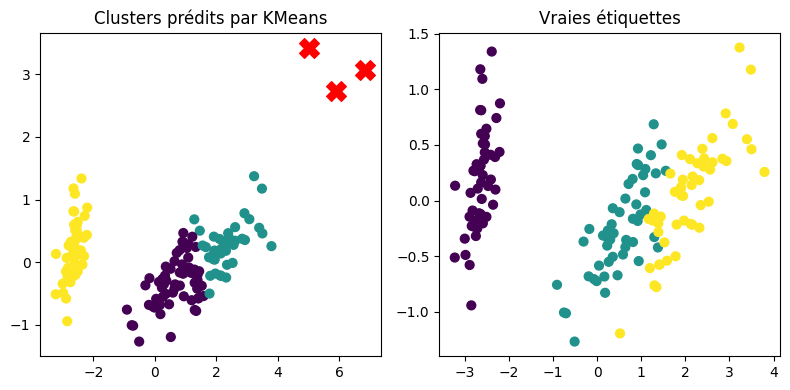

In [5]:
plt.figure(figsize=(8, 4))

# Clusters trouvés par KMeans
plt.subplot(1, 2, 1)
plt.title("Clusters prédits par KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=200)

# Vraies classes
plt.subplot(1, 2, 2)
plt.title("Vraies étiquettes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\alixcover\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv ("marketing_campaign.csv")

In [9]:
df.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
for column in df :
    if len (df [column].unique ())<20000:
        print (f"{column}: {df [column].unique ()}")

ID: [5524 2174 4141 ... 7270 8235 9405]
Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n;Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome: [0 1 2]
Teenhome: [0 1 2]
Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-20

## going to transforme 
### Education : ['Graduation ' 'PhD ' 'Master ' 'Basic ' '2n;Cycle '] -> [0, 1, 2, 3, 4, 5]
### Marital_Status : getting ride of 'Absurd ' and 'YOLO '
### Dt_Customer : transforming the year into age of how long is the customer enrollmed with the company

In [12]:
index_drop = df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index
df_new = df.drop(index_drop)
df_new = df_new.reset_index(drop=True)

In [13]:
df_new.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
for column in df_new :
    if len (df_new [column].unique ())<20:
        print (f"{column}: {df_new [column].unique ()}")

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n;Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']
Kidhome: [0 1 2]
Teenhome: [0 1 2]
NumDealsPurchases: [ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]
NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]
NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]
NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]
NumWebVisitsMonth: [ 7  5  4  6  8  9 20  2  3  1 10  0 14 19 17 13]
AcceptedCmp3: [0 1]
AcceptedCmp4: [0 1]
AcceptedCmp5: [0 1]
AcceptedCmp1: [0 1]
AcceptedCmp2: [0 1]
Complain: [0 1]
Z_CostContact: [3]
Z_Revenue: [11]
Response: [1 0]


In [15]:
df_new.shape 

(2236, 29)

In [16]:
import datetime

column_index = df_new.columns.get_loc('Dt_Customer')
for i in range (df_new.shape [0]) :
    customer_enrol_age = df_new ["Dt_Customer"][i]
    customer_enrol_age = customer_enrol_age[:-1].split("-")
    today = datetime.date.today()
    customer_enrol_date = datetime.date(int (customer_enrol_age [2]), int (customer_enrol_age [1]), int (customer_enrol_age [0]))
    age = today.year - customer_enrol_date.year
    df_new.iloc [i, column_index] = age
    # print (age)

In [17]:
df_new.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,1824,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,1824,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,1824,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,1824,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1824,94,173,...,5,0,0,0,0,0,0,3,11,0


In [18]:
# Education has natural order, so use ordinal encoding
education_mapping = {
    'Basic': 0,
    '2n;Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

# Marital status is nominal (no natural order)
marital_mapping = {
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5
}

# Apply mappings
df_new['Education_encoded'] = df_new['Education'].map(education_mapping)
df_new['Marital_Status_encoded'] = df_new['Marital_Status'].map(marital_mapping)

df_new.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

df_new.head ()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_encoded,Marital_Status_encoded
0,5524,1957,58138.0,0,0,1824,58,635,88,546,...,0,0,0,0,0,3,11,1,2,0
1,2174,1954,46344.0,1,1,1824,38,11,1,6,...,0,0,0,0,0,3,11,0,2,0
2,4141,1965,71613.0,0,0,1824,26,426,49,127,...,0,0,0,0,0,3,11,0,2,1
3,6182,1984,26646.0,1,0,1824,26,11,4,20,...,0,0,0,0,0,3,11,0,2,1
4,5324,1981,58293.0,1,0,1824,94,173,43,118,...,0,0,0,0,0,3,11,0,4,2


In [19]:
df_new = df_new.dropna()
df_new = df_new.reset_index(drop=True)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Assuming your DataFrame is called 'df'
# df = your_dataframe_here

def perform_pca_analysis(df, n_components=None, exclude_cols=None, print_results = True):
    """
    Comprehensive PCA analysis function
    
    Parameters:
    df: pandas DataFrame
    n_components: int or None (if None, will determine optimal number)
    exclude_cols: list of column names to exclude from PCA
    """
    
    # Step 1: Data Preparation
    
    # Default columns to exclude (non-numeric or identifier columns)
    if exclude_cols is None:
        exclude_cols = ['ID']  # Adjust based on your needs
    
    # Remove specified columns
    df_pca = df.drop(columns=exclude_cols, errors='ignore')
    
    # Handle missing values
    missing_values = df_pca.isnull().sum()

    
    # Fill missing values with median for numerical columns
    df_pca = df_pca.fillna(df_pca.median())
    
    # Ensure all columns are numeric
    numeric_cols = df_pca.select_dtypes(include=[np.number]).columns
    df_pca = df_pca[numeric_cols]

    
    # Step 2: Standardization

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_pca)

    
    # Step 3: Determine optimal number of components

    
    # Perform PCA with all components first
    pca_full = PCA()
    pca_full.fit(df_scaled)
    
    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    
    # Find number of components for 80%, 90%, 95% variance
    n_80 = np.argmax(cumulative_variance >= 0.80) + 1
    n_90 = np.argmax(cumulative_variance >= 0.90) + 1
    n_95 = np.argmax(cumulative_variance >= 0.95) + 1

    
    # Step 4: Apply PCA with chosen number of components

    
    if n_components is None:
        n_components = n_90  # Default to 90% variance
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_scaled)

    
    # Step 5: Create results DataFrame

    
    # Create DataFrame with PCA results
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    df_pca_result = pd.DataFrame(pca_result, columns=pca_columns, index=df.index)
    
    # Add original non-PCA columns back if needed
    for col in exclude_cols:
        if col in df.columns:
            df_pca_result[col] = df[col]

    if print_results :
        print("=== Step 1: Data Preparation ===")
        print(f"Missing values per column:")
        print(missing_values[missing_values > 0])
        print(f"Final dataset shape for PCA: {df_pca.shape}")
        print(f"Columns included: {list(df_pca.columns)}")
        print("\n=== Step 2: Standardization ===")
        print("Data has been standardized (mean=0, std=1)")
        print("\n=== Step 3: Determining Optimal Components ===")
        print(f"Components needed for 80% variance: {n_80}")
        print(f"Components needed for 90% variance: {n_90}")
        print(f"Components needed for 95% variance: {n_95}")
        print("\n=== Step 4: Applying PCA ===")
        print(f"PCA applied with {n_components} components")
        print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
        print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")
        print("\n=== Step 5: Creating Results ===")
        print(f"PCA results DataFrame shape: {df_pca_result.shape}")
    
    return {
        'pca_model': pca,
        'scaler': scaler,
        'pca_data': df_pca_result,
        'original_columns': list(df_pca.columns),
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance': cumulative_variance,
        'components': pca.components_
    }

### Local PCA analysis

In [21]:
data = perform_pca_analysis (df_new, print_results=False)

### Modified data set export

In [22]:
df_new.to_csv('data.csv', index=False)

## GUI PCA analysis

In [23]:
from PCA_vizualisation import PCAAnalysisGUI

app = PCAAnalysisGUI()
app.root.mainloop()